<h1>
    <p style="color:blue; text-align:center; border:2px solid Tomato; font-size:180%;">
        <i>
            + Health Insurance Lead Prediction +
        </i>
    </p>
</h1>

<img src="https://i2.wp.com/financebuddha.com/blog/wp-content/uploads/2018/07/20182624/Health-Insurance1.jpg?resize=945%2C532&ssl=1" alt="Qries" width="500" height="90">
   </body>

★ **Hackathon:** https://datahack.analyticsvidhya.com/contest/job-a-thon/

★ **Problem Statement:** Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:
* Demographics (city, age, region etc.)
* Information regarding holding policies of the customer
* Recommended Policy Information

★ **Dataset(s):** Provided on Hackathon web page.
* Training Data: 14 columns, 50883 rows.
* Testing Data: 13 columns, 21806 rows.
* Sample Submission Data: 2 columns, 21806 rows.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # ignore warnings

# Preparing Setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# set seaborn style
sns.set_style('whitegrid')

# setting randomness in notebook
np.random.seed(0)

## Data Loading

In [2]:
train_df = pd.read_csv("training_data.csv")
test_df = pd.read_csv("testing_data.csv")

In [3]:
print(train_df.shape)
#train_df.set_index("ID", inplace = True)
train_df.head()

(50882, 14)


ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

In [4]:
type(train_df.index[0])

int

In [5]:
################train_df['ID'].astype(int)

In [6]:
###########train_df['ID'].dtypes

In [7]:
print(test_df.shape)
#test_df.set_index("ID", inplace = True)
test_df.head()

(21805, 13)


ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0  50883        C1          156             Owned          Individual   
1  50884        C4            7             Owned               Joint   
2  50885        C1          564            Rented          Individual   
3  50886        C3         1177            Rented          Individual   
4  50887        C1          951             Owned          Individual   

   Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         30         30        No              NaN                     6.0   
1         69         68       Yes               X1                     3.0   
2         28         28        No               X3                     2.0   
3         23         23        No               X3                     3.0   
4         75         75        No               X3                     NaN   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  
0                  3.0                5              11934.0  
1                  3.0               18              32204.8  
2                  4.0               17               9240.0  
3                  3.0               18               9086.0  
4                  NaN                5              22534.0

In [8]:
# combining train_df & test_df for predicting missing values:

comb_df = train_df.append(test_df, ignore_index = True)
comb_df = comb_df.fillna('missing_value')

## EDA

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [10]:
train_df.describe(include = 'all')

ID City_Code   Region_Code Accomodation_Type  \
count   50882.000000     50882  50882.000000             50882   
unique           NaN        36           NaN                 2   
top              NaN        C1           NaN             Owned   
freq             NaN      8973           NaN             27951   
mean    25441.500000       NaN   1732.788707               NaN   
std     14688.512535       NaN   1424.081652               NaN   
min         1.000000       NaN      1.000000               NaN   
25%     12721.250000       NaN    523.000000               NaN   
50%     25441.500000       NaN   1391.000000               NaN   
75%     38161.750000       NaN   2667.000000               NaN   
max     50882.000000       NaN   6194.000000               NaN   

       Reco_Insurance_Type     Upper_Age     Lower_Age Is_Spouse  \
count                50882  50882.000000  50882.000000     50882   
unique                   2           NaN           NaN         2   
top             Individual           NaN           NaN        No   
freq                 40536           NaN           NaN     42460   
mean                   NaN     44.856275     42.738866       NaN   
std                    NaN     17.310271     17.319375       NaN   
min                    NaN     18.000000     16.000000       NaN   
25%                    NaN     28.000000     27.000000       NaN   
50%                    NaN     44.000000     40.000000       NaN   
75%                    NaN     59.000000     57.000000       NaN   
max                    NaN     75.000000     75.000000       NaN   

       Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
count             39191                   30631         30631.000000   
unique                9                      15                  NaN   
top                  X1                     1.0                  NaN   
freq              13010                    4499                  NaN   
mean                NaN                     NaN             2.439228   
std                 NaN                     NaN             1.025923   
min                 NaN                     NaN             1.000000   
25%                 NaN                     NaN             1.000000   
50%                 NaN                     NaN             3.000000   
75%                 NaN                     NaN             3.000000   
max                 NaN                     NaN             4.000000   

        Reco_Policy_Cat  Reco_Policy_Premium      Response  
count      50882.000000         50882.000000  50882.000000  
unique              NaN                  NaN           NaN  
top                 NaN                  NaN           NaN  
freq                NaN                  NaN           NaN  
mean          15.115188         14183.950069      0.239947  
std            6.340663          6590.074873      0.427055  
min            1.000000          2280.000000      0.000000  
25%           12.000000          9248.000000      0.000000  
50%           17.000000         13178.000000      0.000000  
75%           20.000000         18096.000000      0.000000  
max           22.000000         43350.400000      1.000000

In [11]:
train_df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

👉 Missing(nan) values are only in 3 columns: 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type'.

In [12]:
missing_values_columns = ['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']

In [13]:
col_name = 'Health Indicator'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique(), '\n')
print('Count of unique values: ') 
train_df[col_name].value_counts()

Column name: Health Indicator

Num of unique values:  10 

Unique values:  ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9'] 

Count of unique values: 


X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [14]:
col_name = 'Holding_Policy_Duration'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique(), '\n')
print('Count of unique values: ') 
train_df[col_name].value_counts()

Column name: Holding_Policy_Duration

Num of unique values:  16 

Unique values:  ['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0'] 

Count of unique values: 


1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [15]:
col_name = 'Holding_Policy_Type'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique(), '\n')
print('Count of unique values: ') 
train_df[col_name].value_counts()

Column name: Holding_Policy_Type

Num of unique values:  5 

Unique values:  [ 3. nan  1.  4.  2.] 

Count of unique values: 


3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [16]:
########################## all 3 missing values columns are Nominal   ################################################

## Data Preprocessing (Data Wrangling + Feature Engineering)

In [17]:
train_df.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

In [18]:
# categorcal columns
nominal_columns = []         # there is no order/ sequence # eg: states.
ordinal_columns = []         # there is order/ sequence # eg: rank.

In [19]:
# numerical columns
numerical_columns = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']

#### City_Code

In [20]:
col_name = 'City_Code'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique())

Column name: City_Code

Num of unique values:  36 

Unique values:  ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']


In [21]:
nominal_columns.append('City_Code')
print('nominal_columns: ',nominal_columns)

nominal_columns:  ['City_Code']


#### Region_Code

In [22]:
col_name = 'Region_Code'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique())

Column name: Region_Code

Num of unique values:  5316 

Unique values:  [3213 1117 3732 ... 5326 6149 5450]


In [23]:
train_df['Region_Code'].min(), train_df['Region_Code'].max()

(1, 6194)

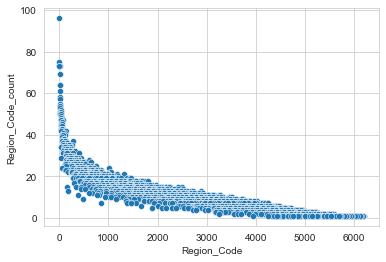

In [24]:
Region_Code_count = train_df['Region_Code'].value_counts()
Region_Code = train_df['Region_Code'].value_counts().index
sns.scatterplot(Region_Code, Region_Code_count)
plt.xlabel('Region_Code'), plt.ylabel('Region_Code_count')
plt.show()

In [25]:
# dropping 'Region_Code' as we are already having 'City_Code' as a geographical location identifier.

train_df.drop(columns = ['Region_Code'], inplace=True)

#### Accomodation_Type

In [26]:
col_name = 'Accomodation_Type'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique())

Column name: Accomodation_Type

Num of unique values:  2 

Unique values:  ['Rented' 'Owned']


In [27]:
nominal_columns.append('Accomodation_Type')
print('nominal_columns: ',nominal_columns)

nominal_columns:  ['City_Code', 'Accomodation_Type']


#### Reco_Insurance_Type

In [28]:
col_name = 'Reco_Insurance_Type'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique())

Column name: Reco_Insurance_Type

Num of unique values:  2 

Unique values:  ['Individual' 'Joint']


In [29]:
nominal_columns.append('Reco_Insurance_Type')
print('nominal_columns: ',nominal_columns)

nominal_columns:  ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type']


#### Is_Spouse

In [30]:
col_name = 'Is_Spouse'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique())

Column name: Is_Spouse

Num of unique values:  2 

Unique values:  ['No' 'Yes']


In [31]:
nominal_columns.append('Is_Spouse')
print('nominal_columns: ',nominal_columns)

nominal_columns:  ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse']


#### Reco_Policy_Cat

In [32]:
col_name = 'Reco_Policy_Cat'
print('Column name: '+col_name+'\n')
print('Num of unique values: ', len(train_df[col_name].unique()), '\n')
print('Unique values: ', train_df[col_name].unique())

Column name: Reco_Policy_Cat

Num of unique values:  22 

Unique values:  [22 19 16 17  1 18 21 13 20  9  2  4 12  6 14 11  3  8  7 10 15  5]


In [33]:
nominal_columns.append('Reco_Policy_Cat')
print('nominal_columns: ',nominal_columns)

nominal_columns:  ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Reco_Policy_Cat']


<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [34]:
nominal_columns

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Reco_Policy_Cat']

In [35]:
ordinal_columns

[]

In [36]:
numerical_columns

['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']

<hr style="height:1px;border-width:0;color:gray;background-color:gray">

### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder**

**Ordinal data** --> data are in order --> **LabelEncoder**

In [37]:
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()

In [38]:
# As City_Code is Nominal Categorical data we will perform OneHotEncoding
City_Code = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["City_Code"]]).toarray())
City_Code.columns = One_Hot_Encoder.get_feature_names(['City_Code'])
City_Code.head()

City_Code_C1  City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C19  City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  \
0            0.0           0.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
4            0.0           0.0            0.0            0.0            0.0   

   City_Code_C23  City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            1.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C28  City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
0            0.0            0.0           1.0            0.0            0.0   
1            0.0            0.0           0.0            0.0            0.0   
2            0.0            0.0           0.0            0.0            0.0   
3            0.0            0.0           0.0            0.0            0.0   
4            0.0            0.0           0.0            0.0            0.0   

   City_Code_C32  City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           1.0           0.0           0.0           0.0   
2           0.0           1.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           1.0   

   City_Code_C9  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [39]:
# As Accomodation_Type is Nominal Categorical data we will perform OneHotEncoding
Accomodation_Type = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Accomodation_Type"]]).toarray())
Accomodation_Type.columns = One_Hot_Encoder.get_feature_names(['Accomodation_Type'])
Accomodation_Type.head()

Accomodation_Type_Owned  Accomodation_Type_Rented
0                      0.0                       1.0
1                      1.0                       0.0
2                      1.0                       0.0
3                      1.0                       0.0
4                      0.0                       1.0

In [40]:
# As Reco_Insurance_Type is Nominal Categorical data we will perform OneHotEncoding
Reco_Insurance_Type = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Reco_Insurance_Type"]]).toarray())
Reco_Insurance_Type.columns = One_Hot_Encoder.get_feature_names(['Reco_Insurance_Type'])
Reco_Insurance_Type.head()

Reco_Insurance_Type_Individual  Reco_Insurance_Type_Joint
0                             1.0                        0.0
1                             0.0                        1.0
2                             1.0                        0.0
3                             0.0                        1.0
4                             1.0                        0.0

In [41]:
# As Is_Spouse is Nominal Categorical data we will perform OneHotEncoding
Is_Spouse = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Is_Spouse"]]).toarray())
Is_Spouse.columns = One_Hot_Encoder.get_feature_names(['Is_Spouse'])
Is_Spouse.head()

Is_Spouse_No  Is_Spouse_Yes
0           1.0            0.0
1           1.0            0.0
2           1.0            0.0
3           1.0            0.0
4           1.0            0.0

In [42]:
# As Reco_Policy_Cat is Nominal Categorical data we will perform OneHotEncoding
Reco_Policy_Cat = pd.DataFrame(One_Hot_Encoder.fit_transform(train_df[["Reco_Policy_Cat"]]).toarray())
Reco_Policy_Cat.columns = One_Hot_Encoder.get_feature_names(['Reco_Policy_Cat'])
Reco_Policy_Cat.head()

Reco_Policy_Cat_1  Reco_Policy_Cat_2  Reco_Policy_Cat_3  Reco_Policy_Cat_4  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   Reco_Policy_Cat_5  Reco_Policy_Cat_6  Reco_Policy_Cat_7  Reco_Policy_Cat_8  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   Reco_Policy_Cat_9  Reco_Policy_Cat_10  Reco_Policy_Cat_11  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   Reco_Policy_Cat_12  Reco_Policy_Cat_13  Reco_Policy_Cat_14  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   Reco_Policy_Cat_15  Reco_Policy_Cat_16  Reco_Policy_Cat_17  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 1.0                 0.0   

   Reco_Policy_Cat_18  Reco_Policy_Cat_19  Reco_Policy_Cat_20  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 1.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 0.0                 0.0   

   Reco_Policy_Cat_21  Reco_Policy_Cat_22  
0                 0.0                 1.0  
1                 0.0                 1.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0

In [43]:
train_df.head()

ID City_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  Lower_Age  \
0   1        C3            Rented          Individual         36         36   
1   2        C5             Owned               Joint         75         22   
2   3        C5             Owned          Individual         32         32   
3   4       C24             Owned               Joint         52         48   
4   5        C8            Rented          Individual         44         44   

  Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
0        No               X1                     14+                  3.0   
1        No               X2                     NaN                  NaN   
2        No              NaN                     1.0                  1.0   
3        No               X1                     14+                  3.0   
4        No               X2                     3.0                  1.0   

   Reco_Policy_Cat  Reco_Policy_Premium  Response  
0               22              11628.0         0  
1               22              30510.0         0  
2               19               7450.0         1  
3               19              17780.0         0  
4               16              10404.0         0

In [44]:
train_df.drop(columns = nominal_columns, inplace=True)

In [45]:
train_df.head()

ID  Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
0   1         36         36               X1                     14+   
1   2         75         22               X2                     NaN   
2   3         32         32              NaN                     1.0   
3   4         52         48               X1                     14+   
4   5         44         44               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Premium  Response  
0                  3.0              11628.0         0  
1                  NaN              30510.0         0  
2                  1.0               7450.0         1  
3                  3.0              17780.0         0  
4                  1.0              10404.0         0

In [46]:
nominal_columns

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Reco_Policy_Cat']

In [47]:
# Concatenate dataframe --> train_df + City_Code + Accomodation_Type + Is_Spouse + Reco_Policy_Cat
train_df = pd.concat([train_df, City_Code, Accomodation_Type, Is_Spouse, Reco_Policy_Cat], axis = 1)

In [48]:
train_df.head()

ID  Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
0   1         36         36               X1                     14+   
1   2         75         22               X2                     NaN   
2   3         32         32              NaN                     1.0   
3   4         52         48               X1                     14+   
4   5         44         44               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Premium  Response  City_Code_C1  \
0                  3.0              11628.0         0           0.0   
1                  NaN              30510.0         0           0.0   
2                  1.0               7450.0         1           0.0   
3                  3.0              17780.0         0           0.0   
4                  1.0              10404.0         0           0.0   

   City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
0            0.0           1.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
4            0.0           0.0            0.0            0.0            0.0   

   City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
0            0.0            0.0            0.0            0.0           0.0   
1            0.0            0.0            0.0            0.0           0.0   
2            0.0            0.0            0.0            0.0           0.0   
3            0.0            0.0            0.0            0.0           0.0   
4            0.0            0.0            0.0            0.0           0.0   

   City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0       

### Predicting Missing Values

In [49]:
missing_values_columns

['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']

train_df_1 = pd.read_csv("training_data.csv")
test_df_1 = pd.read_csv("testing_data.csv")

train_df_1.tail()

test_df_1.head()

In [50]:
### preprecessing of comb_df

comb_df.drop(columns = ['ID', 'Region_Code'], inplace=True)

# As City_Code is Nominal Categorical data we will perform OneHotEncoding
City_Code = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["City_Code"]]).toarray())
City_Code.columns = One_Hot_Encoder.get_feature_names(['City_Code'])

# As Accomodation_Type is Nominal Categorical data we will perform OneHotEncoding
Accomodation_Type = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Accomodation_Type"]]).toarray())
Accomodation_Type.columns = One_Hot_Encoder.get_feature_names(['Accomodation_Type'])

# As Reco_Insurance_Type is Nominal Categorical data we will perform OneHotEncoding
Reco_Insurance_Type = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Reco_Insurance_Type"]]).toarray())
Reco_Insurance_Type.columns = One_Hot_Encoder.get_feature_names(['Reco_Insurance_Type'])

# As Is_Spouse is Nominal Categorical data we will perform OneHotEncoding
Is_Spouse = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Is_Spouse"]]).toarray())
Is_Spouse.columns = One_Hot_Encoder.get_feature_names(['Is_Spouse'])

# As Reco_Policy_Cat is Nominal Categorical data we will perform OneHotEncoding
Reco_Policy_Cat = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Reco_Policy_Cat"]]).toarray())
Reco_Policy_Cat.columns = One_Hot_Encoder.get_feature_names(['Reco_Policy_Cat'])

comb_df.drop(columns = nominal_columns, inplace=True)

# Concatenate dataframe --> comb_df + City_Code + Accomodation_Type + Is_Spouse + Reco_Policy_Cat
comb_df = pd.concat([comb_df, City_Code, Accomodation_Type, Is_Spouse, Reco_Policy_Cat], axis = 1)

In [51]:
numerical_columns

['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in numerical_columns:
    comb_df[col] = scaler.fit_transform(np.array(comb_df[col]).reshape(-1, 1))

In [53]:
comb_df.iloc[50879:50885, :]         # 3 train row, 3 test row

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
50879   1.048796   1.170728               X2                     14+   
50880   1.511399   0.361670               X2                     2.0   
50881  -1.206394  -1.083076               X3                     2.0   
50882  -0.859442  -0.736337    missing_value                     6.0   
50883   1.395748   1.459677               X1                     3.0   
50884  -0.975093  -0.851917               X3                     2.0   

      Holding_Policy_Type  Reco_Policy_Premium       Response  City_Code_C1  \
50879                   1            -0.429844              0           1.0   
50880                   2             2.130941              1           1.0   
50881                   3            -0.422224              0           0.0   
50882                   3            -0.344510  missing_value           1.0   
50883                   3             2.744364  missing_value           0.0   
50884                   4            -0.755023  missing_value           1.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
50879            0.0            0.0           0.0            0.0   
50880            0.0            0.0           0.0            0.0   
50881            0.0            0.0           0.0            0.0   
50882            0.0            0.0           0.0            0.0   
50883            0.0            0.0           0.0            0.0   
50884            0.0            0.0           0.0            0.0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
50879            0.0           0.0            0.0            0.0   
50880            0.0           0.0            0.0            0.0   
50881            0.0           1.0            0.0            0.0   
50882            0.0           0.0            0.0            0.0   
50883            0.0           0.0            0.0            0.0   
50884            0.0           0.0            0.0            0.0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_C

#### Predicting Missing Values: (1) 'Health Indicator'

In [54]:
train_comb = comb_df[comb_df['Health Indicator'] != 'missing_value']
pred_comb = comb_df[comb_df['Health Indicator'] == 'missing_value']

In [55]:
train_comb.head()

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
0  -0.512490  -0.389598               X1                     14+   
1   1.742700  -1.198656               X2           missing_value   
3   0.412716   0.303880               X1                     14+   
4  -0.049887   0.072721               X2                     3.0   
5   0.412716   0.535040               X2                     5.0   

  Holding_Policy_Type  Reco_Policy_Premium Response  City_Code_C1  \
0                   3            -0.391139        0           0.0   
1       missing_value             2.486110        0           0.0   
3                   3             0.546306        0           0.0   
4                   1            -0.577653        0           0.0   
5                   1             0.162917        1           0.0   

   City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   
5            0.0            0.0            0.0            0.0            0.0   

   City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   
5            0.0            0.0            0.0            0.0            0.0   

   City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   
5           0.0            0.0            0.0            0.0            0.0   

   City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   
5            0.0            0.0            0.0            0.0            0.0   

   City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
0            0.0           1.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
4            0.0           0.0            0.0            0.0            0.0   
5            0.0           0.0            0.0            0.0            0.0   

   City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
0            0.0            0.0            0.0            0.0           0.0   
1            0.0            0.0            0.0            0.0           0.0   
3            0.0            0.0            0.0            0.0           0.0   
4            0.0            0.0            0.0            0.0           0.0   
5            0.0            0.0            0.0            0.0           0.0   

   City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4          

In [56]:
pred_comb.head()

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
2   -0.743791  -0.620757    missing_value                     1.0   
6   -0.975093  -0.851917    missing_value           missing_value   
9    0.817494  -0.967496    missing_value                     7.0   
12   1.222272   1.344098    missing_value                     1.0   
19  -1.032918  -0.909707    missing_value           missing_value   

   Holding_Policy_Type  Reco_Policy_Premium Response  City_Code_C1  \
2                    1            -1.027785        1           0.0   
6        missing_value            -0.541691        0           0.0   
9                    4             1.052331        1           1.0   
12                   2             0.456706        1           0.0   
19       missing_value            -0.936356        0           0.0   

    City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
2             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
12            0.0            0.0            0.0            0.0            0.0   
19            0.0            0.0            0.0            0.0            0.0   

    City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
2             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
12            0.0            0.0            0.0            0.0            0.0   
19            0.0            0.0            0.0            0.0            0.0   

    City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
2            0.0            0.0            0.0            0.0            0.0   
6            0.0            0.0            0.0            0.0            0.0   
9            0.0            0.0            0.0            0.0            0.0   
12           0.0            0.0            0.0            0.0            0.0   
19           0.0            1.0            0.0            0.0            0.0   

    City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
2             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
12            0.0            0.0            0.0            0.0            0.0   
19            0.0            0.0            0.0            0.0            0.0   

    City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
2             0.0           0.0            0.0            0.0            0.0   
6             0.0           1.0            0.0            0.0            0.0   
9             0.0           0.0            0.0            0.0            0.0   
12            0.0           0.0            0.0            0.0            0.0   
19            0.0           0.0            0.0            0.0            0.0   

    City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
2             0.0            0.0            0.0            0.0           0.0   
6             0.0            0.0            0.0            0.0           0.0   
9             0.0            0.0            0.0            0.0           0.0   
12            0.0            0.0            0.0            0.0           0.0   
19            0.0            0.0            0.0            0.0           0.0   

    City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
2            1.0           0.0           0.0           0.0           0.0   
6            0.0           0.0           0.0           0.0           0.0   
9            0.0           0.0      

In [57]:
# for predicting missing values
x_train = train_comb.drop(columns = missing_values_columns + ['Response'])
y_train = train_comb['Health Indicator']
x_pred = pred_comb.drop(columns = missing_values_columns + ['Response'])

In [58]:
# for model selection which later will be used for predicting missing values
from sklearn import metrics
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split( x_train, y_train, test_size=0.2, random_state=4)
print ('Train set:', xx_train.shape,  yy_train.shape)
print ('Test set:', xx_test.shape,  yy_test.shape)

Train set: (44775, 65) (44775,)
Test set: (11194, 65) (11194,)


# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

## Finding best value of k

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xx_train,yy_train)
    yhat=neigh.predict(xx_test)
    mean_acc[n-1] = metrics.accuracy_score(yy_test, yhat)

    
    std_acc[n-1]=np.std(yhat==yy_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# KNeighborsClassifier - KNN

k = mean_acc.argmax()+1
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
KNN

y_pred = KNN.predict(x_pred)
y_pred[0:5]

# DecisionTreeClassifier

depth = []
score_DTC = [] 
for i in range(1,21):
    DTC = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state = 1).fit(xx_train, yy_train)
    pred_DTC = DTC.predict(xx_test) 
    score = metrics.accuracy_score(yy_test, pred_DTC)
    depth.append(i)
    score_DTC.append(score)
    
print('We get maximum accuracy_score {} for DecisionTreeClassifier when max_depth = {}.'.format
      (max(score_DTC), depth[score_DTC.index(max(score_DTC))])  )

# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1).fit(xx_train, yy_train)
pred_DTC = DTC.predict(xx_test)
score_DTC = metrics.accuracy_score(yy_test, pred_DTC)
print('DecisionTreeClassifier: ',score_DTC)

# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 1).fit(xx_train, yy_train)
pred_RFC = RFC.predict(xx_test)
score_RFC = metrics.accuracy_score(yy_test, pred_RFC)
print('RandomForestClassifier: ',score_RFC)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
pred_miss_val = RFC.predict(x_pred)
pred_miss_val[:5]

array(['X1', 'X2', 'X2', 'X2', 'X1'], dtype=object)

In [61]:
pred_miss_val = list(pred_miss_val) 
pred_miss_val[:5]

['X1', 'X2', 'X2', 'X2', 'X1']

In [62]:
x_pred.head(10)

Upper_Age  Lower_Age  Reco_Policy_Premium  City_Code_C1  City_Code_C10  \
2   -0.743791  -0.620757            -1.027785           0.0            0.0   
6   -0.975093  -0.851917            -0.541691           0.0            0.0   
9    0.817494  -0.967496             1.052331           1.0            0.0   
12   1.222272   1.344098             0.456706           0.0            0.0   
19  -1.032918  -0.909707            -0.936356           0.0            0.0   
34  -1.322045  -1.198656            -1.256355           0.0            0.0   
35   0.644018   0.766199            -0.094606           0.0            1.0   
40   1.106621   1.228518             0.858686           0.0            0.0   
41  -0.975093  -0.851917            -1.336507           0.0            0.0   
46  -1.379870  -1.256446            -1.525764           0.0            0.0   

    City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  City_Code_C15  \
2             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
12            0.0            0.0            0.0            0.0            0.0   
19            0.0            0.0            0.0            0.0            0.0   
34            0.0            0.0            0.0            0.0            0.0   
35            0.0            0.0            0.0            0.0            0.0   
40            0.0            0.0            0.0            0.0            0.0   
41            0.0            0.0            0.0            0.0            0.0   
46            0.0            0.0            0.0            0.0            0.0   

    City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  City_Code_C2  \
2             0.0            0.0            0.0            0.0           0.0   
6             0.0            0.0            0.0            0.0           0.0   
9             0.0            0.0            0.0            0.0           0.0   
12            0.0            0.0            0.0            0.0           0.0   
19            0.0            0.0            0.0            0.0           0.0   
34            0.0            0.0            0.0            0.0           0.0   
35            0.0            0.0            0.0            0.0           0.0   
40            0.0            0.0            0.0            0.0           1.0   
41            0.0            0.0            1.0            0.0           0.0   
46            0.0            0.0            0.0            0.0           0.0   

    City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
2             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
12            0.0            0.0            0.0            0.0            0.0   
19            1.0            0.0            0.0            0.0            0.0   
34            0.0            0.0            0.0            0.0            0.0   
35            0.0            0.0            0.0            0.0            0.0   
40            0.0            0.0            0.0            0.0            0.0   
41            0.0            0.0            0.0            0.0            0.0   
46            0.0            0.0            0.0            0.0            0.0   

    City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
2             0.0            0.0            0.0            0.0            0.0   
6             0.0            0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0            0.0   
12            0.0            0.0            0.0            0.0            0.0   
19            0.0            0.0            0.0            0.0            0

In [63]:
list(x_pred.head(10).index)

[2, 6, 9, 12, 19, 34, 35, 40, 41, 46]

In [65]:
miss_rows_ind = list(x_pred.index)

numpy.int64(z)

miss_rows_indexs = []
for val in miss_rows_ind:
    miss_rows_indexs.append(np.int64(val))

In [66]:
len(miss_rows_ind), miss_rows_ind[-10:]

(16718, [72633, 72635, 72637, 72650, 72651, 72653, 72654, 72658, 72665, 72666])

In [68]:
miss_rows_ind[0]

2

In [69]:
for miss_rows_index, pred_val in zip(miss_rows_ind, pred_miss_val):
    #comb_df.loc[miss_rows_index, 'Health Indicator'] = pred_val
    comb_df.at[int(miss_rows_index),'Health Indicator']=pred_val

In [70]:
comb_df.head()

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
0  -0.512490  -0.389598               X1                     14+   
1   1.742700  -1.198656               X2           missing_value   
2  -0.743791  -0.620757               X1                     1.0   
3   0.412716   0.303880               X1                     14+   
4  -0.049887   0.072721               X2                     3.0   

  Holding_Policy_Type  Reco_Policy_Premium Response  City_Code_C1  \
0                   3            -0.391139        0           0.0   
1       missing_value             2.486110        0           0.0   
2                   1            -1.027785        1           0.0   
3                   3             0.546306        0           0.0   
4                   1            -0.577653        0           0.0   

   City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
0            0.0           1.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
4            0.0           0.0            0.0            0.0            0.0   

   City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
0            0.0            0.0            0.0            0.0           0.0   
1            0.0            0.0            0.0            0.0           0.0   
2            0.0            0.0            0.0            0.0           0.0   
3            0.0            0.0            0.0            0.0           0.0   
4            0.0            0.0            0.0            0.0           0.0   

   City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3          

In [71]:
comb_df['Health Indicator'].unique()

array(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [72]:
comb_df.iloc[50879:50885, :]         # 3 train row, 3 test row #82 >>>miss

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
50879   1.048796   1.170728               X2                     14+   
50880   1.511399   0.361670               X2                     2.0   
50881  -1.206394  -1.083076               X3                     2.0   
50882  -0.859442  -0.736337               X2                     6.0   
50883   1.395748   1.459677               X1                     3.0   
50884  -0.975093  -0.851917               X3                     2.0   

      Holding_Policy_Type  Reco_Policy_Premium       Response  City_Code_C1  \
50879                   1            -0.429844              0           1.0   
50880                   2             2.130941              1           1.0   
50881                   3            -0.422224              0           0.0   
50882                   3            -0.344510  missing_value           1.0   
50883                   3             2.744364  missing_value           0.0   
50884                   4            -0.755023  missing_value           1.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
50879            0.0            0.0           0.0            0.0   
50880            0.0            0.0           0.0            0.0   
50881            0.0            0.0           0.0            0.0   
50882            0.0            0.0           0.0            0.0   
50883            0.0            0.0           0.0            0.0   
50884            0.0            0.0           0.0            0.0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
50879            0.0           0.0            0.0            0.0   
50880            0.0           0.0            0.0            0.0   
50881            0.0           1.0            0.0            0.0   
50882            0.0           0.0            0.0            0.0   
50883            0.0           0.0            0.0            0.0   
50884            0.0           0.0            0.0            0.0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_C

#### Predicting Missing Values: (2) 'Holding_Policy_Duration'

In [73]:
train_comb = comb_df[comb_df['Holding_Policy_Duration'] != 'missing_value']
pred_comb = comb_df[comb_df['Holding_Policy_Duration'] == 'missing_value']

# for predicting missing values
x_train = train_comb.drop(columns = missing_values_columns + ['Response'])
y_train = train_comb['Holding_Policy_Duration']
x_pred = pred_comb.drop(columns = missing_values_columns + ['Response'])

RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
pred_miss_val = RFC.predict(x_pred)

pred_miss_val = list(pred_miss_val) 

miss_rows_ind = list(x_pred.index)

for miss_rows_index, pred_val in zip(miss_rows_ind, pred_miss_val):
    #comb_df.loc[miss_rows_index, 'Holding_Policy_Duration'] = pred_val
    comb_df.at[int(miss_rows_index),'Holding_Policy_Duration']=pred_val

In [74]:
comb_df.head()

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
0  -0.512490  -0.389598               X1                     14+   
1   1.742700  -1.198656               X2                     14+   
2  -0.743791  -0.620757               X1                     1.0   
3   0.412716   0.303880               X1                     14+   
4  -0.049887   0.072721               X2                     3.0   

  Holding_Policy_Type  Reco_Policy_Premium Response  City_Code_C1  \
0                   3            -0.391139        0           0.0   
1       missing_value             2.486110        0           0.0   
2                   1            -1.027785        1           0.0   
3                   3             0.546306        0           0.0   
4                   1            -0.577653        0           0.0   

   City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
0            0.0           1.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
4            0.0           0.0            0.0            0.0            0.0   

   City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
0            0.0            0.0            0.0            0.0           0.0   
1            0.0            0.0            0.0            0.0           0.0   
2            0.0            0.0            0.0            0.0           0.0   
3            0.0            0.0            0.0            0.0           0.0   
4            0.0            0.0            0.0            0.0           0.0   

   City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3          

In [75]:
comb_df['Holding_Policy_Duration'].unique()

array(['14+', '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0', '11.0',
       '4.0', '8.0', '10.0', '6.0', '13.0', '12.0'], dtype=object)

#### Predicting Missing Values: (3) 'Holding_Policy_Type'

In [76]:
comb_df['Holding_Policy_Type'].unique()

array([3.0, 'missing_value', 1.0, 4.0, 2.0], dtype=object)

In [77]:
temp=[]
for val in comb_df['Holding_Policy_Type']:
    temp.append(str(val))
comb_df['Holding_Policy_Type'] = temp

In [78]:
comb_df['Holding_Policy_Type'].unique()

array(['3.0', 'missing_value', '1.0', '4.0', '2.0'], dtype=object)

In [79]:
comb_df['Holding_Policy_Type'].dtype

dtype('O')

In [80]:
train_comb = comb_df[comb_df['Holding_Policy_Type'] != 'missing_value']
pred_comb = comb_df[comb_df['Holding_Policy_Type'] == 'missing_value']

# for predicting missing values
x_train = train_comb.drop(columns = missing_values_columns + ['Response'])
y_train = train_comb['Holding_Policy_Type']
x_pred = pred_comb.drop(columns = missing_values_columns + ['Response'])

RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
pred_miss_val = RFC.predict(x_pred)

pred_miss_val = list(pred_miss_val) 

miss_rows_ind = list(x_pred.index)

for miss_rows_index, pred_val in zip(miss_rows_ind, pred_miss_val):
    #comb_df.loc[miss_rows_index, 'Holding_Policy_Type'] = pred_val
    comb_df.at[int(miss_rows_index),'Holding_Policy_Type']=pred_val

In [81]:
comb_df.head()

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
0  -0.512490  -0.389598               X1                     14+   
1   1.742700  -1.198656               X2                     14+   
2  -0.743791  -0.620757               X1                     1.0   
3   0.412716   0.303880               X1                     14+   
4  -0.049887   0.072721               X2                     3.0   

  Holding_Policy_Type  Reco_Policy_Premium Response  City_Code_C1  \
0                 3.0            -0.391139        0           0.0   
1                 3.0             2.486110        0           0.0   
2                 1.0            -1.027785        1           0.0   
3                 3.0             0.546306        0           0.0   
4                 1.0            -0.577653        0           0.0   

   City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C2  City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   City_Code_C24  City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
0            0.0           1.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
4            0.0           0.0            0.0            0.0            0.0   

   City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  \
0            0.0            0.0            0.0            0.0           0.0   
1            0.0            0.0            0.0            0.0           0.0   
2            0.0            0.0            0.0            0.0           0.0   
3            0.0            0.0            0.0            0.0           0.0   
4            0.0            0.0            0.0            0.0           0.0   

   City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3          

In [82]:
comb_df.tail()

Upper_Age  Lower_Age Health Indicator Holding_Policy_Duration  \
72682   0.007939   0.130511               X1                     4.0   
72683   0.817494   0.939569               X5                     6.0   
72684   1.684875   1.806417               X3                     2.0   
72685  -1.148569  -1.025286               X4                     3.0   
72686   1.627049   1.748627               X2                     14+   

      Holding_Policy_Type  Reco_Policy_Premium       Response  City_Code_C1  \
72682                 1.0             0.257393  missing_value           0.0   
72683                 3.0             1.096400  missing_value           0.0   
72684                 4.0             0.554839  missing_value           0.0   
72685                 1.0            -0.400282  missing_value           0.0   
72686                 2.0             1.347827  missing_value           0.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            1.0            0.0   
72685            1.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
72682            0.0            0.0           0.0            0.0   
72683            0.0            0.0           0.0            0.0   
72684            0.0            0.0           0.0            0.0   
72685            0.0            0.0           0.0            0.0   
72686            0.0            0.0           1.0            0.0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
72682            0.0           1.0            0.0            0.0   
72683            0.0           0.0            0.0            0.0   
72684            0.0           0.0            0.0            0.0   
72685            0.0           0.0            0.0            0.0   
72686            0.0           0.0            0.0            0.0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_Code_C35  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C36  City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  \
72682            0.0           0.0           0.0           0.0           0.0   
72683            0.0           1.0           0

In [83]:
comb_df['Holding_Policy_Type'].unique()

array(['3.0', '1.0', '4.0', '2.0'], dtype=object)

In [84]:
# As 'Health Indicator' is Nominal Categorical data we will perform OneHotEncoding
Health_Indicator = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Health Indicator"]]).toarray())
Health_Indicator.columns = One_Hot_Encoder.get_feature_names(['Health_Indicator'])

# As 'Holding_Policy_Duration' is Nominal Categorical data we will perform OneHotEncoding
Holding_Policy_Duration = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Holding_Policy_Duration"]]).toarray())
Holding_Policy_Duration.columns = One_Hot_Encoder.get_feature_names(['Holding_Policy_Duration'])

# As 'Holding_Policy_Type' is Nominal Categorical data we will perform OneHotEncoding
Holding_Policy_Type = pd.DataFrame(One_Hot_Encoder.fit_transform(comb_df[["Holding_Policy_Type"]]).toarray())
Holding_Policy_Type.columns = One_Hot_Encoder.get_feature_names(['Holding_Policy_Type'])

comb_df.drop(columns = ['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type'], inplace=True)

# Concatenate dataframe --> comb_df + Health_Indicator + Holding_Policy_Duration + Holding_Policy_Type
comb_df = pd.concat([comb_df, Health_Indicator, Holding_Policy_Duration, Holding_Policy_Type], axis = 1)

In [85]:
comb_df.tail()

Upper_Age  Lower_Age  Reco_Policy_Premium       Response  City_Code_C1  \
72682   0.007939   0.130511             0.257393  missing_value           0.0   
72683   0.817494   0.939569             1.096400  missing_value           0.0   
72684   1.684875   1.806417             0.554839  missing_value           0.0   
72685  -1.148569  -1.025286            -0.400282  missing_value           0.0   
72686   1.627049   1.748627             1.347827  missing_value           0.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            1.0            0.0   
72685            1.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
72682            0.0            0.0           0.0            0.0   
72683            0.0            0.0           0.0            0.0   
72684            0.0            0.0           0.0            0.0   
72685            0.0            0.0           0.0            0.0   
72686            0.0            0.0           1.0            0.0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
72682            0.0           1.0            0.0            0.0   
72683            0.0           0.0            0.0            0.0   
72684            0.0           0.0            0.0            0.0   
72685            0.0           0.0            0.0            0.0   
72686            0.0           0.0            0.0            0.0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_Code_C35  \
72682            0.0            0.0            0.0            0.0   
72683            0.0            0.0            0.0            0.0   
72684            0.0            0.0            0.0            0.0   
72685            0.0            0.0            0.0            0.0   
72686            0.0            0.0            0.0            0.0   

       City_Code_C36  City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  \
72682            0.0           0.0           0.0           0.0           0.0   
72683            0.0           1.0           0.0           0.0           0.0   
72684            0.0           0.0           0.0           0.0           0.0   
72685            0.0           0.0           0.0           0.0           0.0   
72686            0.0           0.0           0.0           0.0           0.0   

       City_Code_C8  City_Code_C9  Accomodation_Type_Owned  \
72682           0.0           0.0                      1.0   
72683           0.0   

In [86]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Upper_Age                     72687 non-null  float64
 1   Lower_Age                     72687 non-null  float64
 2   Reco_Policy_Premium           72687 non-null  float64
 3   Response                      72687 non-null  object 
 4   City_Code_C1                  72687 non-null  float64
 5   City_Code_C10                 72687 non-null  float64
 6   City_Code_C11                 72687 non-null  float64
 7   City_Code_C12                 72687 non-null  float64
 8   City_Code_C13                 72687 non-null  float64
 9   City_Code_C14                 72687 non-null  float64
 10  City_Code_C15                 72687 non-null  float64
 11  City_Code_C16                 72687 non-null  float64
 12  City_Code_C17                 72687 non-null  float64
 13  C

## Seperating train & test data

In [87]:
train_data = comb_df.iloc[:50882, :].copy()
test_data = comb_df.iloc[50882:, :].copy()

In [88]:
 #>>>>>> no of rows in train_df      ======== 50882

In [89]:
print(len(train_data))
train_data.tail()

50882


Upper_Age  Lower_Age  Reco_Policy_Premium Response  City_Code_C1  \
50877  -1.322045  -1.198656            -0.989080        0           0.0   
50878  -1.032918  -0.909707            -1.338946        0           0.0   
50879   1.048796   1.170728            -0.429844        0           1.0   
50880   1.511399   0.361670             2.130941        1           1.0   
50881  -1.206394  -1.083076            -0.422224        0           0.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
50877            0.0            0.0            0.0            0.0   
50878            0.0            0.0            0.0            0.0   
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
50877            0.0            0.0            0.0            0.0   
50878            0.0            0.0            0.0            0.0   
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
50877            0.0            0.0           0.0            0.0   
50878            0.0            0.0           0.0            0.0   
50879            0.0            0.0           0.0            0.0   
50880            0.0            0.0           0.0            0.0   
50881            0.0            0.0           0.0            0.0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
50877            0.0            0.0            0.0            0.0   
50878            0.0            0.0            0.0            0.0   
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
50877            0.0            0.0            0.0            0.0   
50878            0.0            0.0            0.0            0.0   
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
50877            0.0           0.0            0.0            0.0   
50878            0.0           0.0            0.0            0.0   
50879            0.0           0.0            0.0            0.0   
50880            0.0           0.0            0.0            0.0   
50881            0.0           1.0            0.0            0.0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_Code_C35  \
50877            0.0            0.0            0.0            0.0   
50878            0.0            0.0            0.0            0.0   
50879            0.0            0.0            0.0            0.0   
50880            0.0            0.0            0.0            0.0   
50881            0.0            0.0            0.0            0.0   

       City_Code_C36  City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  \
50877            0.0           1.0           0.0           0.0           0.0   
50878            0.0           0.0           1.0           0.0           0.0   
50879            0.0           0.0           0.0           0.0           0.0   
50880            0.0           0.0           0.0           0.0           0.0   
50881            0.0           0.0           0.0           0.0           0.0   

       City_Code_C8  City_Code_C9  Accomodation_Type_Owned  \
50877           0.0           0.0                      0.0   
50878           0.0           0.0                      0.0

In [90]:
type(train_data.Response[0])

float

In [91]:
train_data.Response.dtype

dtype('O')

In [92]:
temp = []
for val in train_data.Response:
    temp.append(int(val))
    
train_data.Response = temp

In [93]:
train_data.Response.dtype

dtype('int64')

In [94]:
type(train_data.Response[0])

numpy.int64

In [95]:
print(len(test_data))
test_data.head()

21805


Upper_Age  Lower_Age  Reco_Policy_Premium       Response  City_Code_C1  \
50882  -0.859442  -0.736337            -0.344510  missing_value           1.0   
50883   1.395748   1.459677             2.744364  missing_value           0.0   
50884  -0.975093  -0.851917            -0.755023  missing_value           1.0   
50885  -1.264220  -1.140866            -0.778490  missing_value           0.0   
50886   1.742700   1.864206             1.270723  missing_value           1.0   

       City_Code_C10  City_Code_C11  City_Code_C12  City_Code_C13  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C14  City_Code_C15  City_Code_C16  City_Code_C17  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C18  City_Code_C19  City_Code_C2  City_Code_C20  \
50882            0.0            0.0           0.0            0.0   
50883            0.0            0.0           0.0            0.0   
50884            0.0            0.0           0.0            0.0   
50885            0.0            0.0           0.0            0.0   
50886            0.0            0.0           0.0            0.0   

       City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C29  City_Code_C3  City_Code_C30  City_Code_C31  \
50882            0.0           0.0            0.0            0.0   
50883            0.0           0.0            0.0            0.0   
50884            0.0           0.0            0.0            0.0   
50885            0.0           1.0            0.0            0.0   
50886            0.0           0.0            0.0            0.0   

       City_Code_C32  City_Code_C33  City_Code_C34  City_Code_C35  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C36  City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  \
50882            0.0           0.0           0.0           0.0           0.0   
50883            0.0           1.0           0.0           0.0           0.0   
50884            0.0           0.0           0.0           0.0           0.0   
50885            0.0           0.0           0.0           0.0           0.0   
50886            0.0           0.0           0.0           0.0           0.0   

       City_Code_C8  City_Code_C9  Accomodation_Type_Owned  \
50882           0.0           0.0                      1.0   
50883           0.0   

# Model Training

In [96]:
x_train = train_data.drop(columns = 'Response')
y_train = train_data['Response']
x_pred = test_data.drop(columns = 'Response')

In [97]:
x_train.head()

Upper_Age  Lower_Age  Reco_Policy_Premium  City_Code_C1  City_Code_C10  \
0  -0.512490  -0.389598            -0.391139           0.0            0.0   
1   1.742700  -1.198656             2.486110           0.0            0.0   
2  -0.743791  -0.620757            -1.027785           0.0            0.0   
3   0.412716   0.303880             0.546306           0.0            0.0   
4  -0.049887   0.072721            -0.577653           0.0            0.0   

   City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  City_Code_C15  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C16  City_Code_C17  City_Code_C18  City_Code_C19  City_Code_C2  \
0            0.0            0.0            0.0            0.0           0.0   
1            0.0            0.0            0.0            0.0           0.0   
2            0.0            0.0            0.0            0.0           0.0   
3            0.0            0.0            0.0            0.0           0.0   
4            0.0            0.0            0.0            0.0           0.0   

   City_Code_C20  City_Code_C21  City_Code_C22  City_Code_C23  City_Code_C24  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            1.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C25  City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  City_Code_C33  \
0           1.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   City_Code_C34  City_Code_C35  City_Code_C36  City_Code_C4  City_Code_C5  \
0            0.0            0.0            0.0           0.0           0.0   
1            0.0            0.0            0.0           0.0           1.0   
2            0.0            0.0            0.0           0.0           1.0   
3            0.0            0.0            0.0           0.0           0.0   
4            0.0            0.0            0.0           0.0           0.0   

   City_Code_C6  City_Code_C7  City_Code_C8  City_Code_C9  \
0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0   
4           0.0           0.0           1.0           0.0   

   Accomodation_Type_Owned  Accomodation_Type_Rented  Is_Spouse_No  \
0                      0.0                       1.0           1.0   
1                      1.0                       0.0           1.0   
2                      1.0                       0.0           1.0   
3                      1.0     

In [98]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [99]:
x_pred.head()

Upper_Age  Lower_Age  Reco_Policy_Premium  City_Code_C1  City_Code_C10  \
50882  -0.859442  -0.736337            -0.344510           1.0            0.0   
50883   1.395748   1.459677             2.744364           0.0            0.0   
50884  -0.975093  -0.851917            -0.755023           1.0            0.0   
50885  -1.264220  -1.140866            -0.778490           0.0            0.0   
50886   1.742700   1.864206             1.270723           1.0            0.0   

       City_Code_C11  City_Code_C12  City_Code_C13  City_Code_C14  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C15  City_Code_C16  City_Code_C17  City_Code_C18  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C19  City_Code_C2  City_Code_C20  City_Code_C21  \
50882            0.0           0.0            0.0            0.0   
50883            0.0           0.0            0.0            0.0   
50884            0.0           0.0            0.0            0.0   
50885            0.0           0.0            0.0            0.0   
50886            0.0           0.0            0.0            0.0   

       City_Code_C22  City_Code_C23  City_Code_C24  City_Code_C25  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C26  City_Code_C27  City_Code_C28  City_Code_C29  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C3  City_Code_C30  City_Code_C31  City_Code_C32  \
50882           0.0            0.0            0.0            0.0   
50883           0.0            0.0            0.0            0.0   
50884           0.0            0.0            0.0            0.0   
50885           1.0            0.0            0.0            0.0   
50886           0.0            0.0            0.0            0.0   

       City_Code_C33  City_Code_C34  City_Code_C35  City_Code_C36  \
50882            0.0            0.0            0.0            0.0   
50883            0.0            0.0            0.0            0.0   
50884            0.0            0.0            0.0            0.0   
50885            0.0            0.0            0.0            0.0   
50886            0.0            0.0            0.0            0.0   

       City_Code_C4  City_Code_C5  City_Code_C6  City_Code_C7  City_Code_C8  \
50882           0.0           0.0           0.0           0.0           0.0   
50883           1.0           0.0           0.0           0.0           0.0   
50884           0.0           0.0           0.0           0.0           0.0   
50885           0.0           0.0           0.0           0.0           0.0   
50886           0.0           0.0           0.0           0.0           0.0   

       City_Code_C9  Accomodation_Type_Owned  Accomodation_Type_Rented  \
50882           0.0                      1.0                       0.0   
5088

In [100]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
y_pred = RFC.predict(x_pred)

In [101]:
y_pred[:11]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [102]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

#### Hyperparameter Tuning
* Choose following method for hyperparameter tuning
 1. RandomizedSearchCV --> Fast
 2. GridSearchCV
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [105]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [106]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor()

In [107]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
RFR_model_RandomizedSearchCV = RandomizedSearchCV(estimator = RFR_model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

RFR_model_RandomizedSearchCV.fit(xx_train,yy_train)

RFR_model_RandomizedSearchCV.best_params_

yy_pred = RFR_model_RandomizedSearchCV.predict(xx_test)

sns.distplot(yy_test-yy_pred)
plt.show()

plt.figure(figsize = (6,4))
plt.scatter(yy_test, yy_pred, alpha = 0.5)
plt.xlabel("yy_test")
plt.ylabel("yy_pred")
plt.show()

# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(yy_test, yy_pred))
print('MSE:', metrics.mean_squared_error(yy_test, yy_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yy_test, yy_pred)))
print('r2_score:', metrics.r2_score(yy_test, yy_pred))

### Final Prediction

# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
y_pred = RFC.predict(x_pred)

RFR_model_RandomizedSearchCV.fit(x_train, y_train)

Prediction = RFR_model_RandomizedSearchCV.predict(x_pred)

In [108]:
ID_values = [x + 1 for x in x_pred.index]

In [112]:
Prediction = pd.DataFrame({'ID':ID_values, 'Response':y_pred})

In [113]:
print(Prediction.shape)
Prediction.head()

(21805, 2)


ID  Response
0  50883         1
1  50884         0
2  50885         0
3  50886         0
4  50887         0

In [114]:
# 72687
Prediction.tail()

ID  Response
21800  72683         0
21801  72684         0
21802  72685         0
21803  72686         0
21804  72687         0

Saving the Prediction as a excel file.

In [118]:
Prediction.to_csv(r'C:\Users\DEV\Documents\Sahil Documents\Projects\Hackathon_Analytics_Vidhya\My_Prediction_CSV.csv',
                    index = False)